In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [2]:
# Load the dataset
data = pd.read_csv("C:\\Users\\Tejas\\Credit_Card_Fraud_Detection\\creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Data Preprocessing
# Address data imbalance using oversampling
oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(data.drop('Class', axis=1), data['Class'])

In [4]:
# Data normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_resampled)

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_resampled, test_size=0.2, random_state=42)

In [6]:
# Dimension Reduction using PCA
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [7]:
# Anomaly Detection Algorithms
# Isolation Forest
clf_iforest = IsolationForest(contamination=0.1, random_state=42)
clf_iforest.fit(X_train_pca)
y_pred_iforest = clf_iforest.predict(X_test_pca)

In [8]:
# Local Outlier Factor
clf_lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_lof = clf_lof.fit_predict(X_test_pca)

In [9]:
# Autoencoder (using Keras)
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001))
model.fit(X_train_pca, y_train, epochs=10, batch_size=32, shuffle=True, validation_split=0.2)

Epoch 1/10
8530/8530 [==============================] - 32s 4ms/step - loss: 0.1423 - val_loss: 0.1160
Epoch 2/10
8530/8530 [==============================] - 32s 4ms/step - loss: 0.0971 - val_loss: 0.0916
Epoch 3/10
8530/8530 [==============================] - 31s 4ms/step - loss: 0.0848 - val_loss: 0.0832
Epoch 4/10
8530/8530 [==============================] - 31s 4ms/step - loss: 0.0769 - val_loss: 0.0715
Epoch 5/10
8530/8530 [==============================] - 31s 4ms/step - loss: 0.0701 - val_loss: 0.0694
Epoch 6/10
8530/8530 [==============================] - 31s 4ms/step - loss: 0.0642 - val_loss: 0.0596
Epoch 7/10
8530/8530 [==============================] - 31s 4ms/step - loss: 0.0577 - val_loss: 0.0593
Epoch 8/10
8530/8530 [==============================] - 32s 4ms/step - loss: 0.0523 - val_loss: 0.0598
Epoch 9/10
8530/8530 [==============================] - 31s 4ms/step - loss: 0.0494 - val_loss: 0.0461
Epoch 10/10
8530/8530 [==============================] - 31s 4ms/step - l

In [10]:
# Predict with Autoencoder
y_pred_autoencoder = model.predict(X_test_pca)

2666/2666 [==============================] - 4s 1ms/step


In [11]:
# Model Evaluation
print("Isolation Forest:")
# Evaluate the performance of Isolation Forest
# Calculate precision, recall, F1-score, and ROC-AUC
precision_iforest = precision_score(y_test, y_pred_iforest,average='micro')
recall_iforest = recall_score(y_test, y_pred_iforest,average='macro')
f1_iforest = f1_score(y_test, y_pred_iforest,average='weighted')
roc_auc_iforest = roc_auc_score(y_test, y_pred_iforest)
print(f"Precision: {precision_iforest}, Recall: {recall_iforest}, F1-Score: {f1_iforest}, ROC-AUC: {roc_auc_iforest}")

Isolation Forest:
Precision: 0.24741192332493112, Recall: 0.24666292633892042, F1-Score: 0.13409913864508338, ROC-AUC: 0.38027143831335447


C:\Users\Tejas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
print("\nAutoencoder:")
# Evaluate the performance of Autoencoder
# Assuming you have binary labels for anomaly detection
y_pred_autoencoder_bin = (y_pred_autoencoder > 0.5).astype(int)
precision_autoencoder = precision_score(y_test, y_pred_autoencoder_bin)
recall_autoencoder = recall_score(y_test, y_pred_autoencoder_bin)
f1_autoencoder = f1_score(y_test, y_pred_autoencoder_bin)
roc_auc_autoencoder = roc_auc_score(y_test, y_pred_autoencoder)
print(f"Precision: {precision_autoencoder}, Recall: {recall_autoencoder}, F1-Score: {f1_autoencoder}, ROC-AUC: {roc_auc_autoencoder}")


Autoencoder:
Precision: 0.967729596272212, Recall: 0.9758398204642682, F1-Score: 0.9717677869925797, ROC-AUC: 0.9983397136593154


In [13]:
#Hyperparameter Tuning using GridSearchCV
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [14]:
# Define hyperparameters and their candidate values for Isolation Forest
param_grid_iforest = {
    'n_estimators': [100, 200, 300],
    'max_samples': [0.5, 0.7, 0.9],
    'contamination': [0.05, 0.1, 0.2]
}

grid_search_iforest = GridSearchCV(
    estimator=clf_iforest, param_grid=param_grid_iforest, cv=5, scoring='f1_weighted', verbose=2)
grid_search_iforest.fit(X_train_pca, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END contamination=0.05, max_samples=0.5, n_estimators=100; total time=   8.9s
[CV] END contamination=0.05, max_samples=0.5, n_estimators=100; total time=   8.4s
[CV] END contamination=0.05, max_samples=0.5, n_estimators=100; total time=   8.5s
[CV] END contamination=0.05, max_samples=0.5, n_estimators=100; total time=   8.5s
[CV] END contamination=0.05, max_samples=0.5, n_estimators=100; total time=   8.9s
[CV] END contamination=0.05, max_samples=0.5, n_estimators=200; total time=  17.6s
[CV] END contamination=0.05, max_samples=0.5, n_estimators=200; total time=  18.1s
[CV] END contamination=0.05, max_samples=0.5, n_estimators=200; total time=  18.0s
[CV] END contamination=0.05, max_samples=0.5, n_estimators=200; total time=  18.1s
[CV] END contamination=0.05, max_samples=0.5, n_estimators=200; total time=  17.7s
[CV] END contamination=0.05, max_samples=0.5, n_estimators=300; total time=  26.8s
[CV] END contamination=0.

[CV] END contamination=0.2, max_samples=0.5, n_estimators=200; total time=  20.4s
[CV] END contamination=0.2, max_samples=0.5, n_estimators=300; total time=  29.8s
[CV] END contamination=0.2, max_samples=0.5, n_estimators=300; total time=  29.9s
[CV] END contamination=0.2, max_samples=0.5, n_estimators=300; total time=  29.9s
[CV] END contamination=0.2, max_samples=0.5, n_estimators=300; total time=  30.0s
[CV] END contamination=0.2, max_samples=0.5, n_estimators=300; total time=  29.8s
[CV] END contamination=0.2, max_samples=0.7, n_estimators=100; total time=  11.6s
[CV] END contamination=0.2, max_samples=0.7, n_estimators=100; total time=  11.4s
[CV] END contamination=0.2, max_samples=0.7, n_estimators=100; total time=  11.4s
[CV] END contamination=0.2, max_samples=0.7, n_estimators=100; total time=  11.8s
[CV] END contamination=0.2, max_samples=0.7, n_estimators=100; total time=  12.0s
[CV] END contamination=0.2, max_samples=0.7, n_estimators=200; total time=  22.0s
[CV] END contami

GridSearchCV(cv=5,
             estimator=IsolationForest(contamination=0.1, random_state=42),
             param_grid={'contamination': [0.05, 0.1, 0.2],
                         'max_samples': [0.5, 0.7, 0.9],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_weighted', verbose=2)

In [15]:
# Best hyperparameters for Isolation Forest
best_params_iforest = grid_search_iforest.best_params_
best_estimator_iforest = grid_search_iforest.best_estimator_

print("Best Hyperparameters for Isolation Forest:", best_params_iforest)

Best Hyperparameters for Isolation Forest: {'contamination': 0.05, 'max_samples': 0.5, 'n_estimators': 300}


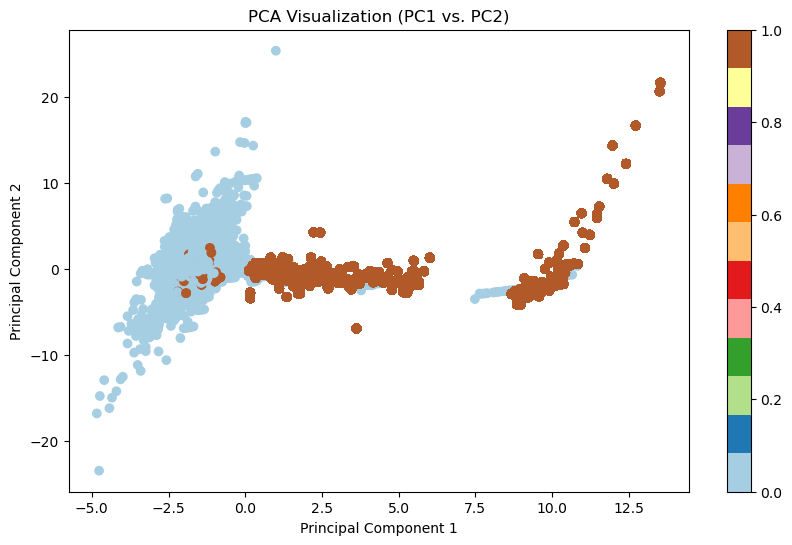

In [18]:
# Visualize data distribution in reduced dimensions using PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title('PCA Visualization (PC1 vs. PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()# Hyperparameter tuning for Local Outlier Factor
param_grid_lof = {
    'n_neighbors': [10, 20, 30],
    'contamination': [0.05, 0.1, 0.2]
}

grid_search_lof = GridSearchCV(
    estimator=clf_lof, param_grid=param_grid_lof, cv=5, scoring='f1', verbose=2)
grid_search_lof.fit(X_train_pca, y_train)

# Best hyperparameters for Local Outlier Factor
best_params_lof = grid_search_lof.best_params_
best_estimator_lof = grid_search_lof.best_estimator_

print("Best Hyperparameters for Local Outlier Factor:", best_params_lof)
